In [1]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.lines import Line2D
from pandas.tseries.offsets import MonthEnd

import matplotlib.gridspec as gridspec

# Données

In [2]:
model_data = pd.read_parquet("data/model_data.parquet")
model_data_no_journal = pd.read_parquet("data/model_data_njl.parquet")

model_data['month'] = model_data['month'].dt.to_timestamp()
model_data_no_journal['month'] = model_data_no_journal['month'].dt.to_timestamp()

alignment_groups = [
    (['Right', 'Left', 'Center'],
     {'Right': 'cornflowerblue',
      'Left': 'orchid',
      'Center': 'goldenrod'}),
    (['Far left', 'Far right', 'Other'],
     {'Far left': 'crimson',
      'Far right': 'royalblue',
      'Other': 'forestgreen'})]

In [3]:
presi_dates = [
    "26/04/1981", "10/05/1981",
    "24/04/1988", "08/05/1988",
    "23/04/1995", "07/05/1995",
    "21/04/2002", "05/05/2002",
    "22/04/2007", "06/05/2007",
    "22/04/2012", "06/05/2012",
    "21/04/2017", "07/05/2017",
    "10/04/2022", "24/04/2022"]
presi_months = pd.to_datetime(presi_dates, dayfirst=True).to_period('M').drop_duplicates()

legi_dates = [
    "14/06/1981", "21/06/1981",
    "16/03/1986",
    "05/06/1988", "11/06/1988",
    "21/03/1993", "28/03/1993",
    "25/05/1997", "01/06/1997",
    "09/06/2002", "16/06/2002",
    "10/06/2007", "17/06/2007",
    "10/06/2012", "17/06/2012",
    "11/06/2017", "18/06/2017",
    "12/06/2022", "19/06/2022",
    "29/06/2024", "06/07/2024"]
legi_months = pd.to_datetime(legi_dates, dayfirst=True).to_period('M').drop_duplicates()

europ_dates = [
    "17/06/1984",
    "18/06/1989",
    "12/06/1994",
    "13/06/1999",
    "13/06/2004",
    "07/06/2009",
    "25/05/2014",
    "26/05/2019",
    "09/06/2024"]
europ_months = pd.to_datetime(europ_dates, dayfirst=True).to_period('M').drop_duplicates()

main_elec_dates = presi_dates + legi_dates + europ_dates
main_elec_months = pd.to_datetime(main_elec_dates, dayfirst=True).to_period('M').drop_duplicates().sort_values()

def add_shaded_periods(ax_list, periods, color, alpha):
    start_period = None
    for i, period in enumerate(periods):
        if start_period is None:
            start_period = period
        is_last = (i == len(periods) - 1)
        is_gap = (not is_last and periods[i + 1] != period + 1)
        if is_last or is_gap:
            end_period = period
            start = start_period.to_timestamp()
            end = (end_period + MonthEnd(1)).to_timestamp()
            for ax in ax_list:
                ax.axvspan(start, end, color=color, alpha=alpha)
            start_period = None

In [4]:
def plot_trends(outcome, title, save_name):
    fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

    for ax, (political_alignments, colors) in zip(axes, alignment_groups):
        alignment_handles = []

        for alignment in political_alignments:
            subset_data = model_data_no_journal[model_data_no_journal['political_alignment'] == alignment][['month', 'political_alignment', outcome]].copy()
            subset_data['MA'] = subset_data[outcome].rolling(window=6).mean()

            ax.plot(subset_data['month'], subset_data[outcome], label=None,
                    alpha=0.2, color=colors[alignment], linestyle='-')
            ax.plot(subset_data['month'], subset_data['MA'], label=None,
                    alpha=0.65, color=colors[alignment], linestyle='-.')

            alignment_handles.append(Line2D([0], [0], color=colors[alignment], lw=2, label=alignment))

        # Legend for alignments
        alignment_legend = ax.legend(handles=alignment_handles, title="Political alignment", loc="upper left")
        ax.add_artist(alignment_legend)

        # Legend for line types
        line_type_handles = [
            Line2D([0], [0], color='black', lw=2, linestyle='-', label="Monthly average"),
            Line2D([0], [0], color='black', lw=2, linestyle='-.', label="6 months moving average")
        ]
        ax.legend(handles=line_type_handles, title="Values", loc="upper right")

    axes[-1].set_xlabel("")

    add_shaded_periods(axes, main_elec_months, color='black', alpha=0.1)

    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(save_name, dpi=300, bbox_inches='tight')
    plt.show()

# 1. Nombre de citations

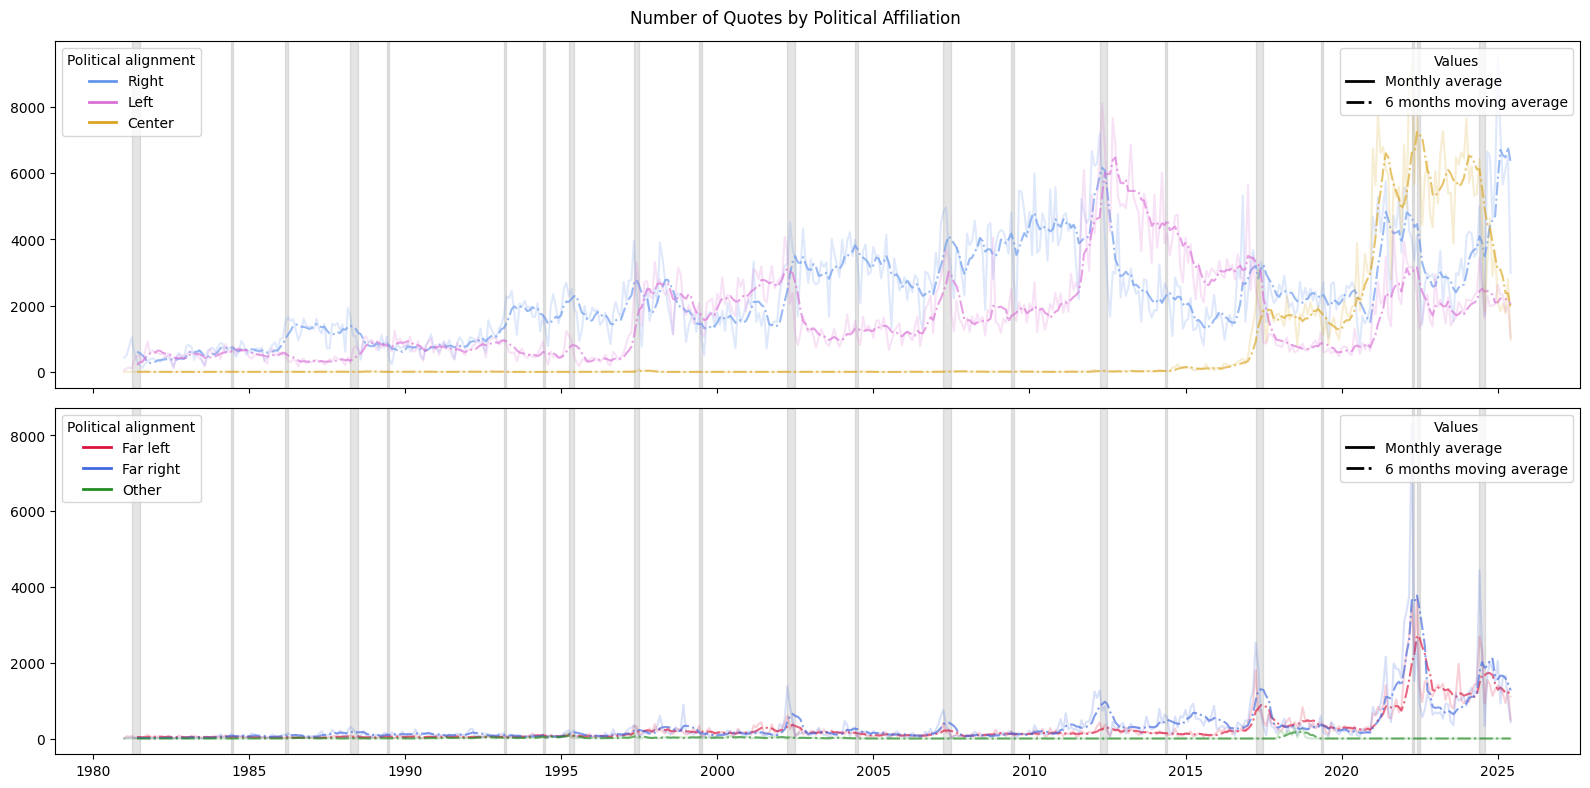

In [5]:
plot_trends(
    outcome="quote_nb",
    title="Number of Quotes by Political Affiliation",
    save_name="output/explore_quote_nb.png")

# 2. Nombre d'articles avec des citations

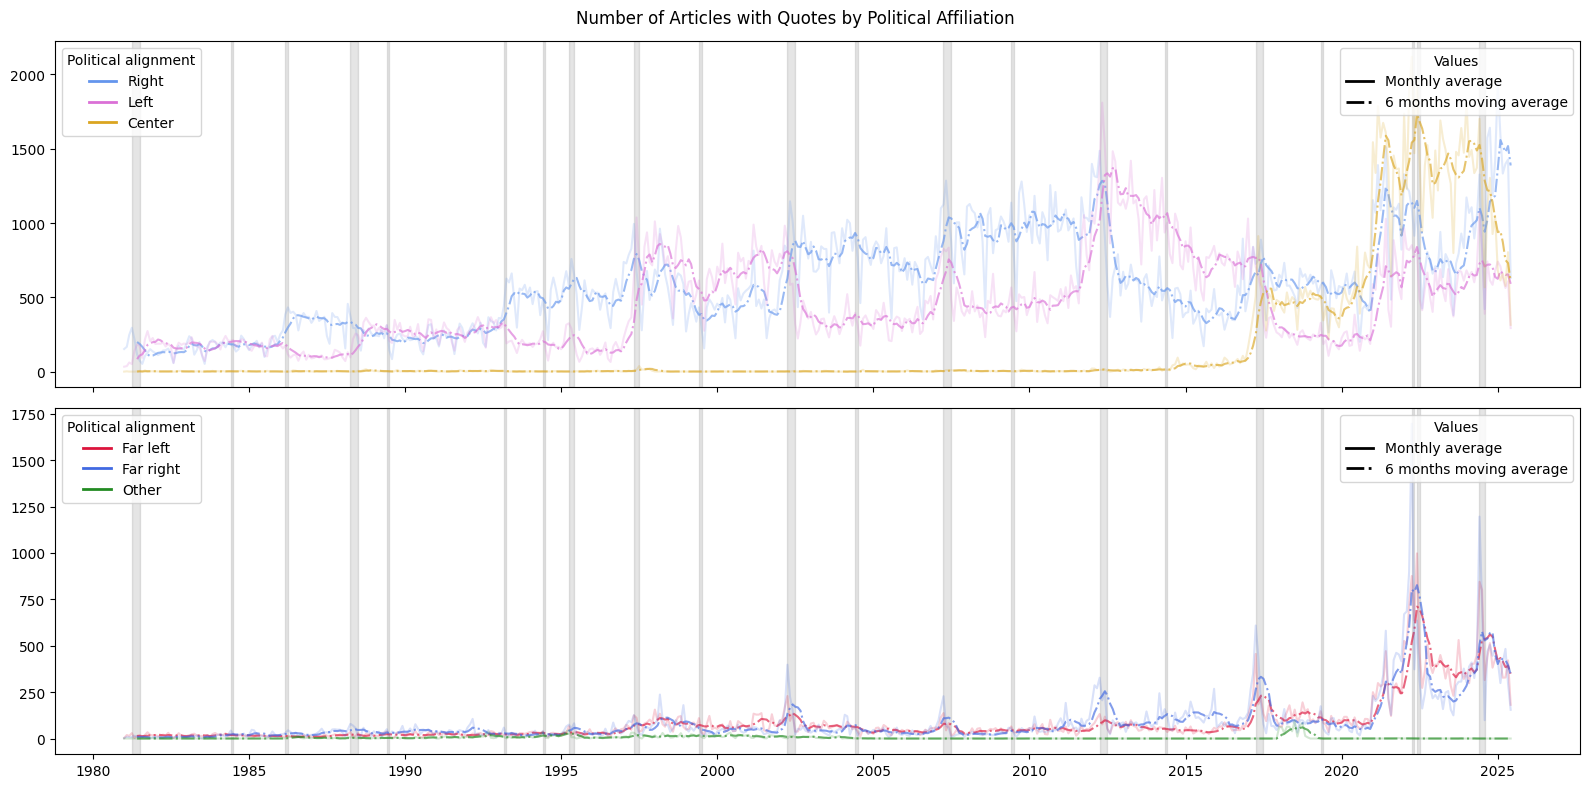

In [6]:
plot_trends(
    outcome="art_nb",
    title="Number of Articles with Quotes by Political Affiliation",
    save_name="output/explore_art_nb.png")

# 3. Longueur des citations

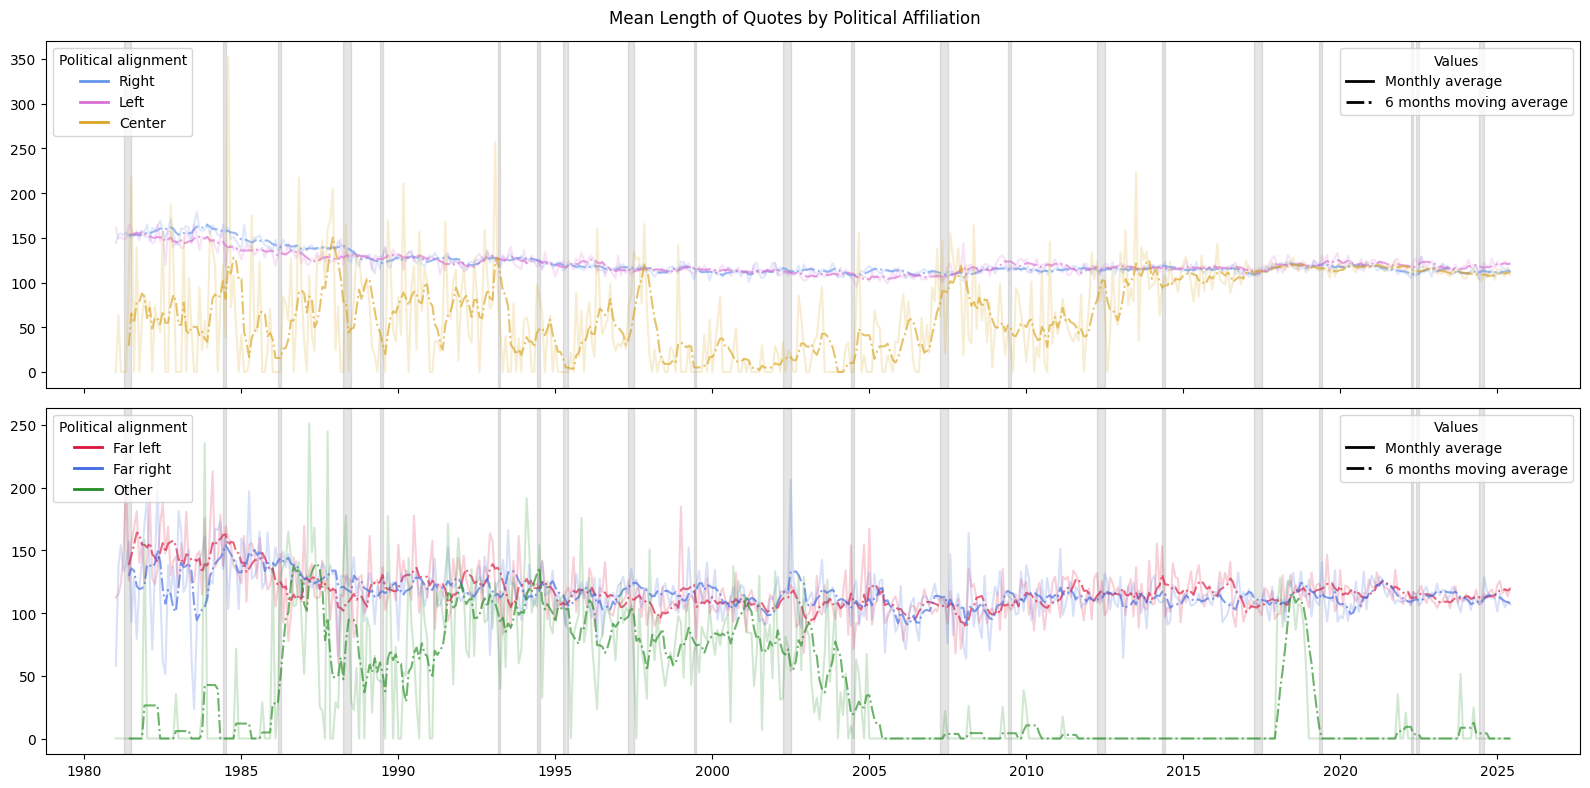

In [7]:
plot_trends(
    outcome="mean_quote_length",
    title="Mean Length of Quotes by Political Affiliation",
    save_name="output/explore_quote_length.png")

# 4. Modalités de citation

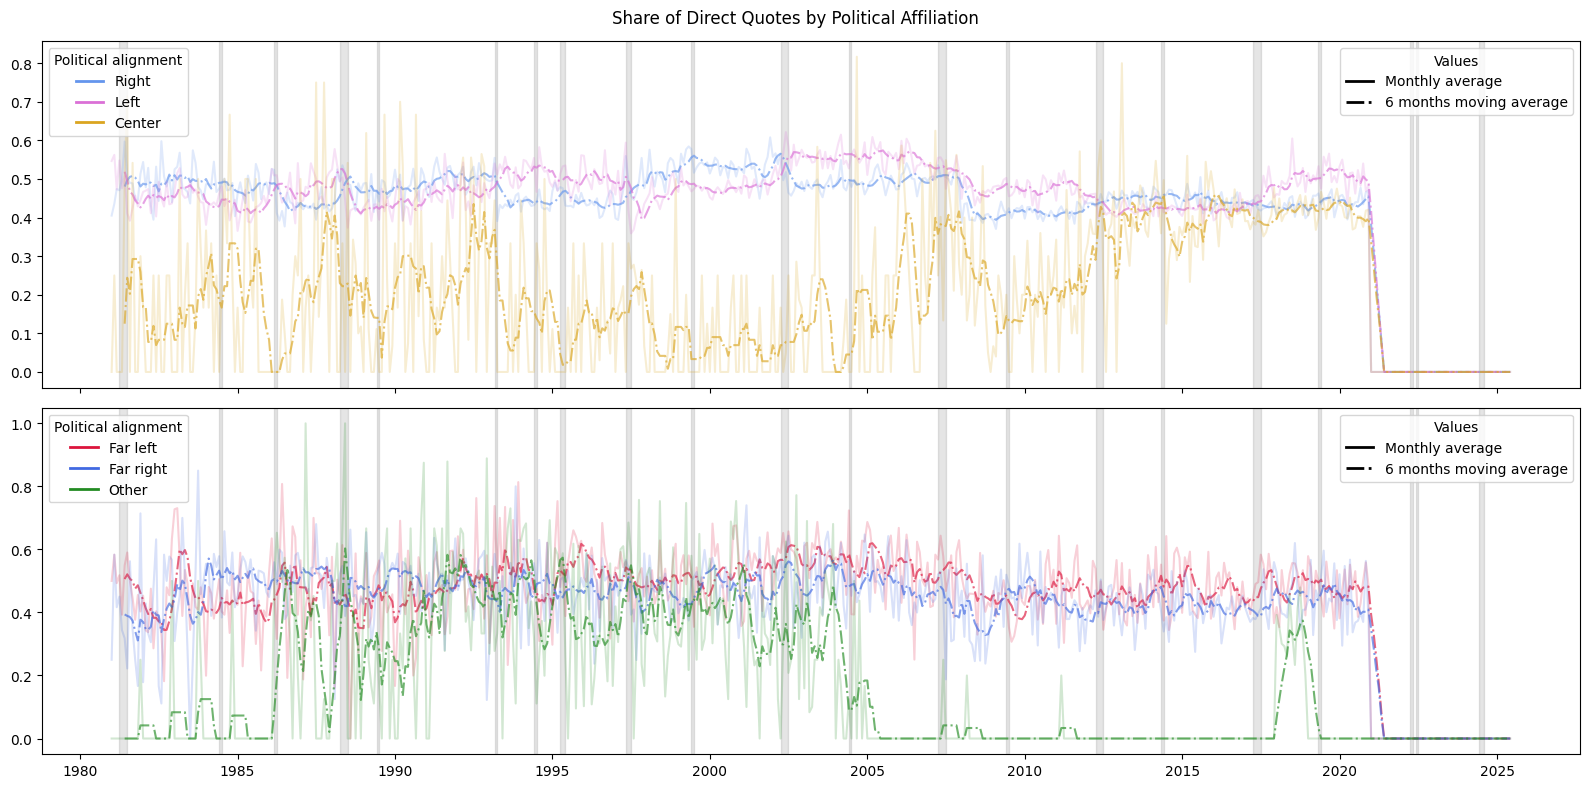

In [8]:
plot_trends(
    outcome="type_direct_share",
    title="Share of Direct Quotes by Political Affiliation",
    save_name="output/explore_direct_quote.png")

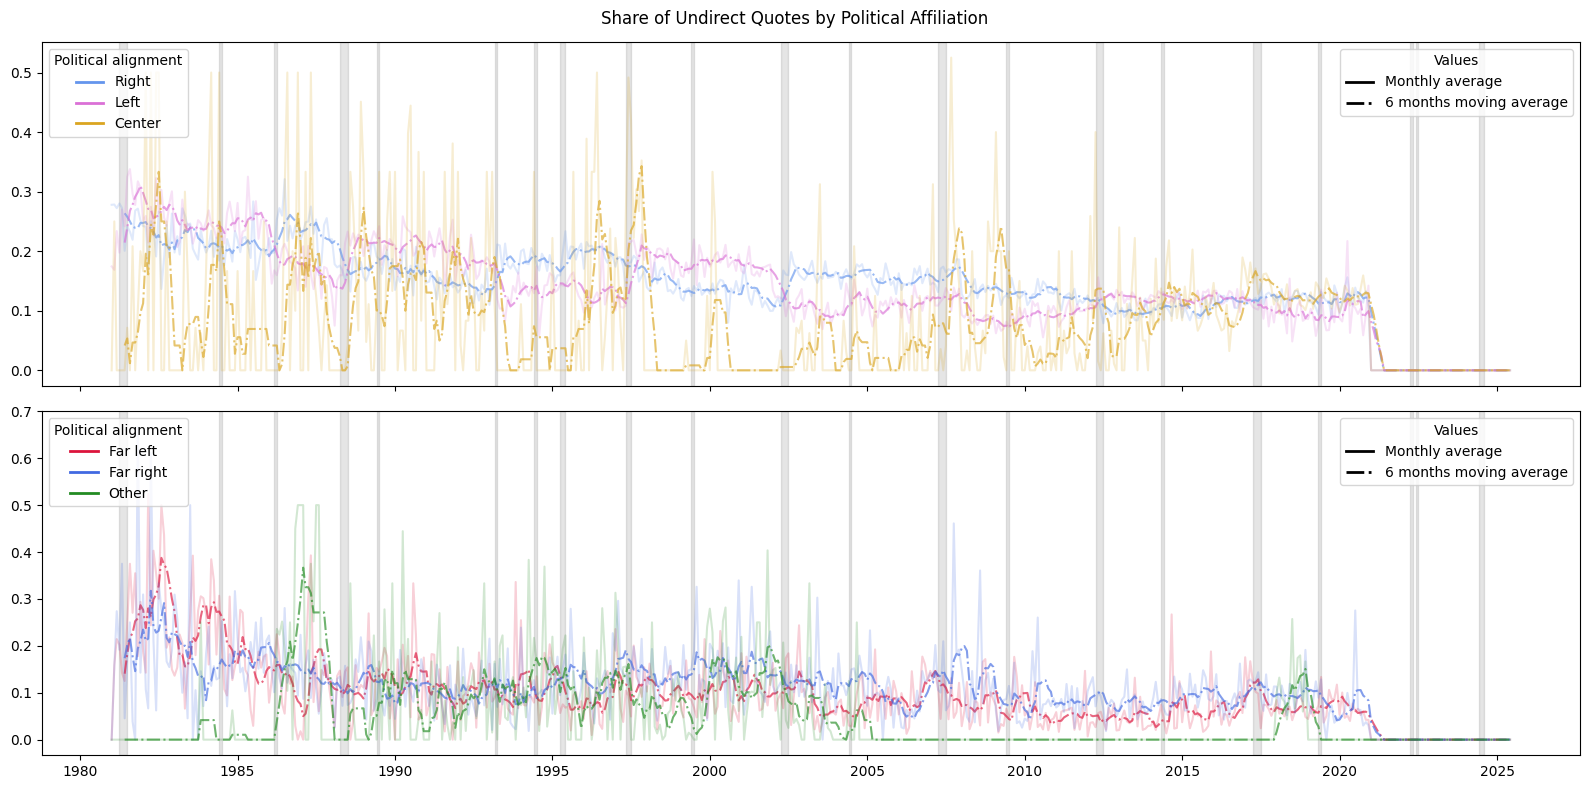

In [9]:
plot_trends(
    outcome="type_undirect_share",
    title="Share of Undirect Quotes by Political Affiliation",
    save_name="output/explore_undirect_quote.png")

# 5. Personnalités

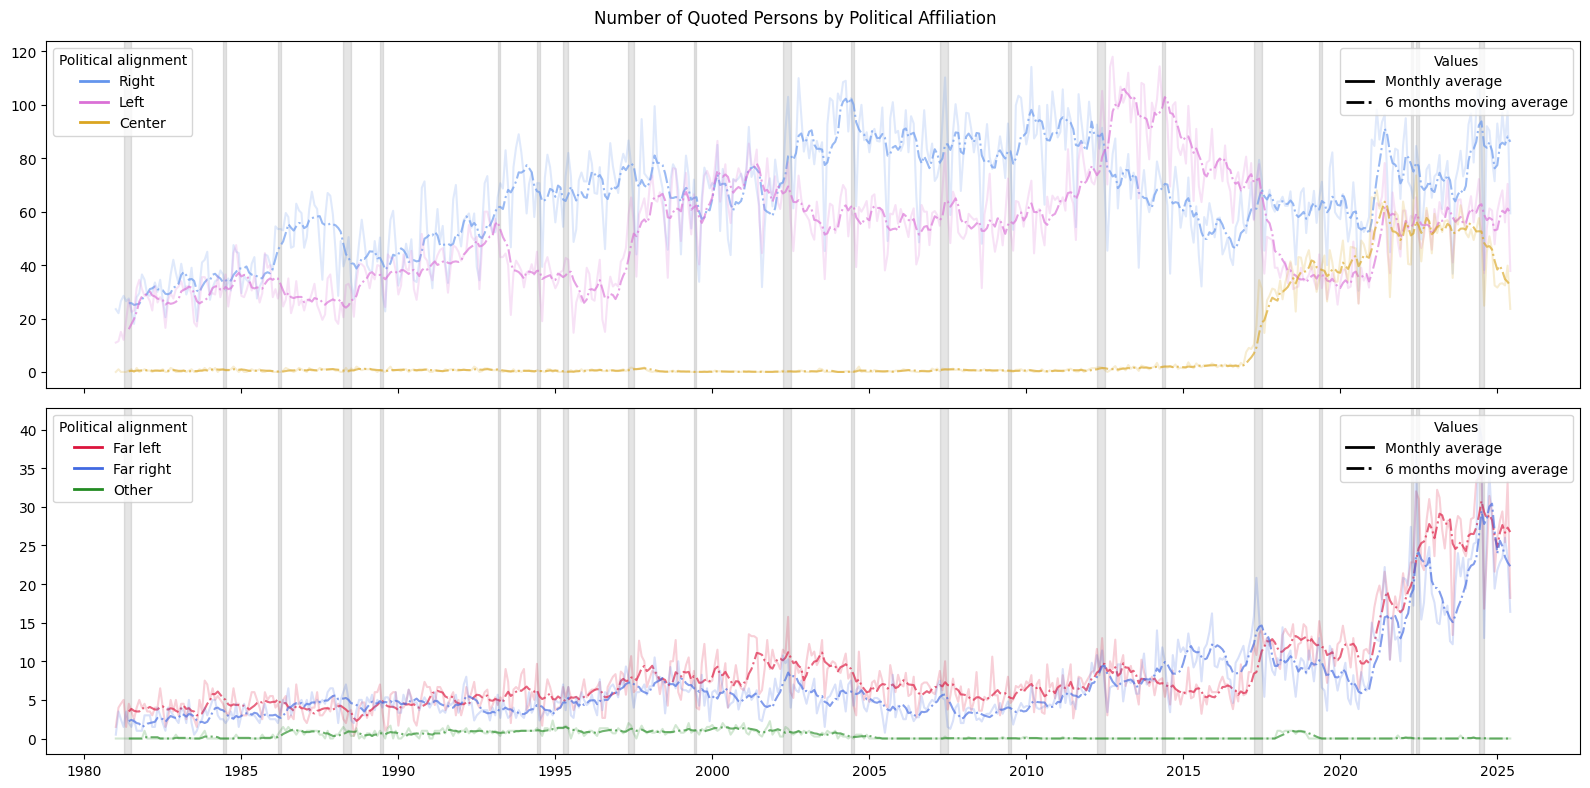

In [10]:
plot_trends(
    outcome="personalities_nb",
    title="Number of Quoted Persons by Political Affiliation",
    save_name="output/explore_persons.png")